# API Quest
## Oslo

## HYPOTHESIS 1
- Men are over represented in Nobel Prizes
- Older people get more prizes
- USA has the most nobels

## Selected data sources

1. Nobel API
2. crossref.org
3. https://archive.ics.uci.edu/ml/datasets/Gender+by+Name
4. namsor.app

In [374]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [375]:
#imports
import os
import requests
import time
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime
import plotly.express as px
from wrangling import *

import numpy as np
import matplotlib.pyplot as plt

In [376]:
#settings
pd.set_option('display.max_colwidth', 900)
pd.set_option('display.max_rows', 40)

In [377]:
#load env
load_dotenv()
name_token = os.getenv('NAME_KEY')


### MAIN DATA

In [378]:
laureates_url = 'https://api.nobelprize.org/2.1/laureates'

In [379]:
laureates_df = load_or_fetch_laureates('sources/laureates.csv', laureates_url)
display(laureates_df)

Loading cached laureates data


,id,fileName,gender,sameAs,knownName.en,knownName.se,givenName.en,givenName.se,familyName.en,familyName.se,...,nobelPrizes_1.affiliations_4.countryNow.en,nobelPrizes_1.affiliations_4.countryNow.no,nobelPrizes_1.affiliations_4.countryNow.se,nobelPrizes_1.affiliations_4.countryNow.sameAs,nobelPrizes_1.affiliations_4.countryNow.latitude,nobelPrizes_1.affiliations_4.countryNow.longitude,nobelPrizes_1.affiliations_4.continent.en,nobelPrizes_1.affiliations_4.locationString.en,nobelPrizes_1.affiliations_4.locationString.no,nobelPrizes_1.affiliations_4.locationString.se
0,1,rontgen,male,"['https://www.wikidata.org/wiki/Q35149', 'https://en.wikipedia.org/wiki/Wilhelm_Röntgen']",Wilhelm Conrad Röntgen,Wilhelm Conrad Röntgen,Wilhelm Conrad,Wilhelm Conrad,Röntgen,Röntgen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,lorentz,male,"['https://www.wikidata.org/wiki/Q41688', 'https://en.wikipedia.org/wiki/Hendrik_Lorentz']",Hendrik A. Lorentz,Hendrik A. Lorentz,Hendrik A.,Hendrik A.,Lorentz,Lorentz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,zeeman,male,"['https://www.wikidata.org/wiki/Q79000', 'https://en.wikipedia.org/wiki/Pieter_Zeeman']",Pieter Zeeman,Pieter Zeeman,Pieter,Pieter,Zeeman,Zeeman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,becquerel,male,"['https://www.wikidata.org/wiki/Q41269', 'https://en.wikipedia.org/wiki/Henri_Becquerel']",Henri Becquerel,Henri Becquerel,Henri,Henri,Becquerel,Becquerel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,pierre-curie,male,"['https://www.wikidata.org/wiki/Q37463', 'https://en.wikipedia.org/wiki/Pierre_Curie']",Pierre Curie,Pierre Curie,Pierre,Pierre,Curie,Curie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1030,brus,male,"['https://www.wikidata.org/wiki/Q194646', 'https://en.wikipedia.org/wiki/Louis_E._Brus']",Louis Brus,Louis Brus,Louis,Louis,Brus,Brus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,1031,yekimov,male,"['https://www.wikidata.org/wiki/Q1547368', 'https://en.wikipedia.org/wiki/Alexei_Ekimov']",Aleksey Yekimov,Aleksej Jekimov,Aleksey,Aleksej,Yekimov,Jekimov,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,1032,fosse,male,"['https://www.wikidata.org/wiki/Q443868', 'https://en.wikipedia.org/wiki/Jon_Fosse']",Jon Fosse,Jon Fosse,Jon,Jon,Fosse,Fosse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,1033,mohammadi,female,"['https://www.wikidata.org/wiki/Q4967771', 'https://en.wikipedia.org/wiki/Narges_Mohammadi']",Narges Mohammadi,Narges Mohammadi,Narges,Narges,Mohammadi,Mohammadi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### GENDER ANALYSIS

In [380]:
#gender data schema
gender_columns = get_json('schema')

In [381]:
#transforms df into usable form
gender_df = shape_dataframe(laureates_df, gender_columns)
display(gender_df)

,id,name,gender,year,field
0,1,Wilhelm Conrad Röntgen,male,1901,Physics
1,2,Hendrik A. Lorentz,male,1902,Physics
2,3,Pieter Zeeman,male,1902,Physics
3,4,Henri Becquerel,male,1903,Physics
4,5,Pierre Curie,male,1903,Physics
...,...,...,...,...,...
985,1028,Anne L’Huillier,female,2023,Physics
986,1029,Moungi Bawendi,male,2023,Chemistry
987,1030,Louis Brus,male,2023,Chemistry
988,1031,Aleksey Yekimov,male,2023,Chemistry


In [382]:
#shape nobels by year
nobels_by_year = gender_df.groupby(['year', 'gender']).size().unstack(fill_value=0)
nobels_by_year['total'] = nobels_by_year.apply(sum, axis=1)
display(nobels_by_year)

gender,female,male,total
year,,,
1901,0,3,3
1902,0,4,4
1903,1,4,5
1904,0,3,3
1905,0,3,3
...,...,...,...
2019,1,11,12
2020,3,7,10
2021,0,10,10


In [383]:
#display ratios
nobels_by_year['Women Winners'] = nobels_by_year['female'] / nobels_by_year['total']
nobels_by_year['Men Winners'] = nobels_by_year['male'] / nobels_by_year['total']
display(nobels_by_year.head(3))

gender,female,male,total,Women Winners,Men Winners
year,,,,,
1901,0,3,3,0.0,1.0
1902,0,4,4,0.0,1.0
1903,1,4,5,0.2,0.8


In [384]:
#select only ratios
nobels_ratio_by_year = nobels_by_year[['Women Winners', 'Men Winners']]
nobels_ratio_by_year.reset_index(inplace=True)
display(nobels_ratio_by_year.head(3))

gender,year,Women Winners,Men Winners
0,1901,0.0,1.0
1,1902,0.0,1.0
2,1903,0.2,0.8


In [385]:
custom_colors = {
    'Men Nobel Win': '#1f77b4',        
    'Men Scientists': '#87ceeb',            
    'Women Nobel Win': '#cd8816',     
    'Women Scientists': '#ffb333',          
}

In [386]:
#cumulative count
gender_cumulative = gender_df.groupby(['year', 'gender']).size().unstack(fill_value=0).cumsum()
gender_cumulative = gender_cumulative.rename(columns={'male': 'Men Winners', 'female': 'Women Winners'})

display(gender_cumulative.head(3))

gender,Women Winners,Men Winners
year,,
1901,0,3
1902,0,7
1903,1,11


In [387]:
fig = px.line(gender_cumulative, x=gender_cumulative.index, y=['Men Winners', 'Women Winners'], title='Cumulative Gender Distribution of Nobel Laureates', color_discrete_map=custom_colors)
fig.update_layout(template='plotly_white')
fig.show()

### FIELD ANALYSIS  

In [388]:
#get the authors of random papers
authors_names_df = get_papers_authors(gender_columns, 1901, 2023, 'initial')
display(authors_names_df)

Loading from cached names db


,year,field,name,gender
0,1901,Physics,Ludwig,NaN
1,1901,Physics,Dawson,NaN
2,1901,Physics,John,NaN
3,1901,Physics,George,NaN
4,1901,Chemistry,Bernard,NaN
...,...,...,...,...
4549,2023,Economic Sciences,Vincenzo,NaN
4550,2023,Economic Sciences,Henrique,NaN
4551,2023,Economic Sciences,Tünde-Ilona,NaN
4552,2023,Economic Sciences,Salvatore,NaN


In [389]:
#genderize the names
fields_df = genderize_names(authors_names_df, name_token)
display(fields_df.head(3))

,year,field,name,gender
0,1901,Physics,Ludwig,male
1,1901,Physics,Dawson,male
2,1901,Physics,John,male


In [390]:
# count of males and females by year
gender_scientists = fields_df.groupby(['year', 'gender']).size().unstack(fill_value=0).reset_index()
gender_scientists['total'] = gender_scientists['female'] + gender_scientists['male']
display(gender_scientists.head(3))

gender,year,female,male,total
0,1901,3,23,26
1,1902,3,23,26
2,1903,5,20,25


In [391]:
#add ratios
gender_scientists['Women Scientists'] = gender_scientists['female'] / gender_scientists['total']
gender_scientists['Men Scientists'] = gender_scientists['male'] / gender_scientists['total']
display(gender_scientists)

gender,year,female,male,total,Women Scientists,Men Scientists
0,1901,3,23,26,0.115385,0.884615
1,1902,3,23,26,0.115385,0.884615
2,1903,5,20,25,0.200000,0.800000
3,1904,6,18,24,0.250000,0.750000
4,1905,6,24,30,0.200000,0.800000
...,...,...,...,...,...,...
118,2019,10,29,39,0.256410,0.743590
119,2020,17,23,40,0.425000,0.575000
120,2021,17,23,40,0.425000,0.575000
121,2022,21,19,40,0.525000,0.475000


In [392]:
#select only ratios
scientists_ratio_by_year = gender_scientists[['year', 'Women Scientists','Men Scientists']]
display(scientists_ratio_by_year.head(3))

gender,year,Women Scientists,Men Scientists
0,1901,0.115385,0.884615
1,1902,0.115385,0.884615
2,1903,0.200000,0.800000


### JOINT ANALYSIS

In [393]:
#merge the two raio datasets
merged_df = pd.merge(nobels_ratio_by_year, scientists_ratio_by_year, on='year')
display(merged_df)

gender,year,Women Winners,Men Winners,Women Scientists,Men Scientists
0,1901,0.000000,1.000000,0.115385,0.884615
1,1902,0.000000,1.000000,0.115385,0.884615
2,1903,0.200000,0.800000,0.200000,0.800000
3,1904,0.000000,1.000000,0.250000,0.750000
4,1905,0.000000,1.000000,0.200000,0.800000
...,...,...,...,...,...
114,2019,0.083333,0.916667,0.256410,0.743590
115,2020,0.300000,0.700000,0.425000,0.575000
116,2021,0.000000,1.000000,0.425000,0.575000
117,2022,0.111111,0.888889,0.525000,0.475000


In [394]:
# Create the line graph with markers
fig = px.line(
    merged_df,
    x='year',
    y=[
        'Men Winners',
        'Men Scientists', 
        'Women Winners', 
        'Women Scientists', 
        ],
    title='Gender Ratios in Scientific Papers and Nobel Laureates Over Time',
    color_discrete_map=custom_colors,
)
# Apply a theme
fig.update_layout(template='plotly_white')
# Update fonts

fig.add_annotation(
    x=2009,
    y=merged_df.loc[merged_df['year'] == 2009, 'Women Winners'].values[0],
    text="Rare over representation",
    showarrow=True,
    arrowhead=1
)
fig.show()


In [395]:
# Calculate average ratios over time
average_ratios_df = merged_df.mean().to_frame(name='Average').T
average_ratios_df = average_ratios_df.drop(columns='year')
display(average_ratios_df)

# Create a bar chart for average ratios
fig_avg = px.bar(
    average_ratios_df.melt(var_name='Category', value_name='Average Ratio'),
    x='Category',
    y='Average Ratio',
    title='Average Gender Ratios in Scientific Papers and Nobel Laureates',
    color='Category',
    color_discrete_map=custom_colors
)
fig_avg.update_layout(template='plotly_white')
fig_avg.show()

gender,Women Winners,Men Winners,Women Scientists,Men Scientists
Average,0.028383,0.971617,0.184554,0.815446


### AGE AND COUNTRY ANALYSIS

Till now we totally collect 991 laureates for further analysis
 Column:fullName
fullName
<class 'str'>    949
Name: count, dtype: int64
___________
 Column:gender
gender
<class 'str'>    949
Name: count, dtype: int64
___________
 Column:birth_date
birth_date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    949
Name: count, dtype: int64
___________
 Column:birth_country
birth_country
<class 'str'>    949
Name: count, dtype: int64
___________
 Column:country_now
country_now
<class 'str'>    949
Name: count, dtype: int64
___________
 Column:continent
continent
<class 'str'>    949
Name: count, dtype: int64
___________
 Column:nobel_category
nobel_category
<class 'str'>    949
Name: count, dtype: int64
___________
 Column:awardYear
awardYear
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    949
Name: count, dtype: int64
___________
 Column:dateAwarded
dateAwarded
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    949
Name: count, dtype: int64
___________
 Column:age_at_award
ag

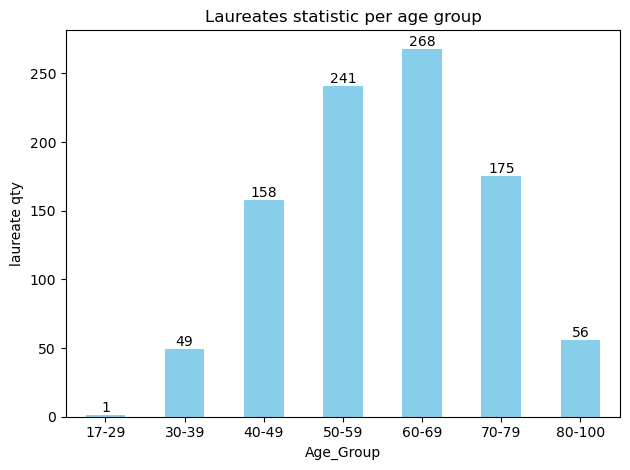

_______________________________________________________________________
Below show NobelPrize laureates statistic by countries:


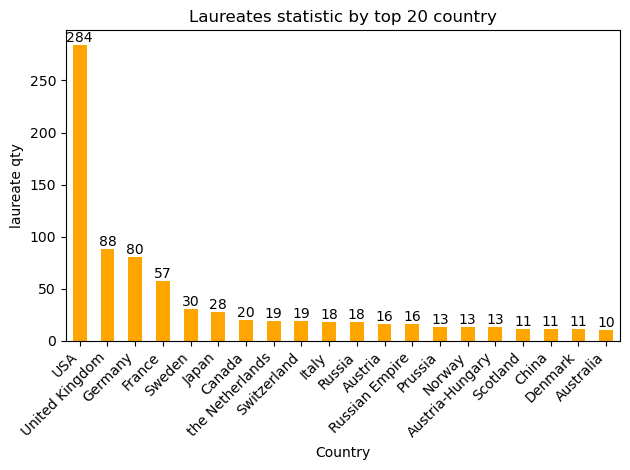

In [396]:
base_url = "http://api.nobelprize.org/2.1/laureates"
limit = 50
offset = 1
total_laureates = 991
all_laureates ={}

while offset < total_laureates:
    params = {
        "offset": offset,
        "limit": limit,
        "format":"json"
    }
    
    response = requests.get(base_url,params=params,timeout=20)
    if response.status_code == 200:
        data = response.json()
    
        for laureate in data['laureates']:
            all_laureates[laureate['id']] = laureate
            
        offset = offset + limit
    else:
        print(f"error:{response.status_code}")
        break
print(f"Till now we totally collect {len(all_laureates)} laureates for further analysis")
all_laureates

def extract_data(laureate_data):
    extracted_data = {}
    try:
        extracted_data['fullName'] = laureate_data.get('fullName', {}).get('en', None)  
        extracted_data['gender'] = laureate_data.get('gender', None)  
        extracted_data['birth_date'] = laureate_data.get('birth', {}).get('date', None)  
        extracted_data['birth_country'] = laureate_data.get('birth', {}).get('place', {}).get('country', {}).get('en', None)  
        extracted_data['country_now'] = laureate_data.get('birth', {}).get('place', {}).get('countryNow', {}).get('en', None)  
        extracted_data['continent'] = laureate_data.get('birth', {}).get('place', {}).get('continent', {}).get('en', None)  
        extracted_data['nobel_category'] = laureate_data.get('nobelPrizes', [{}])[0].get('category', {}).get('en', None)  
        extracted_data['awardYear'] = laureate_data.get('nobelPrizes', [{}])[0].get('awardYear', None)  
        extracted_data['dateAwarded'] = laureate_data.get('nobelPrizes', [{}])[0].get('dateAwarded', None)  
    except (KeyError, IndexError, AttributeError):
        pass
    
    return extracted_data

# extract all laureates data
def process_multiple_entries(all_laureates):
    final_data = {}
    for laureate_id, laureate_data in all_laureates.items():
        final_data[laureate_id] = extract_data(laureate_data)  
    return final_data

dictionaries = all_laureates  
final_dictionary = process_multiple_entries(dictionaries)

df = pd.DataFrame.from_dict(final_dictionary, orient='index')

def calculate_age_at_award(row):
    try:
        birth_date = pd.to_datetime(row['birth_date'], errors='coerce')  
        date_awarded = pd.to_datetime(row['dateAwarded'], errors='coerce')  
        
        if pd.notnull(birth_date) and pd.notnull(date_awarded):
            age_at_award = date_awarded.year - birth_date.year
            if date_awarded < birth_date + pd.DateOffset(years=age_at_award):  # check if Award-date before or after birth date
                age_at_award -= 1
            return age_at_award
        else:
            return None  # deal with missing value
    except:
        return None  # deal with dis-normal 

# Calculate all laureates age when being awarded and insert as a new column:
df['age_at_award'] = df.apply(calculate_age_at_award, axis=1).astype('Int64')

## Data cleaning:
  #remove totally 28 laureates rows which missing birth_date data or show invalid date format:
df = df.dropna(subset=['birth_date'])
for col in df[['birth_date','awardYear','dateAwarded']]:
    invalid_dates =df[col].str.contains(r"00-00",na=False)
    if invalid_dates.any():
        df = df[~invalid_dates]
    
df['birth_date']=pd.to_datetime(df['birth_date'], errors='coerce')
df['awardYear']=pd.to_datetime(df['awardYear'], errors='coerce')
df['dateAwarded']=pd.to_datetime(df['dateAwarded'], errors='coerce')

for col in df.columns:
    print(f" Column:{col}")
    print(df[col].apply(type).value_counts())
    print("___________")
    
print()

## Visualize all hypothesis/insight :

# hypothesis 1:
print(f"Below show total age group statistic for all NobelPrize laureates:")
bins = [17,29,39,49,59,69,79,100]
labels =['17-29','30-39','40-49','50-59','60-69','70-79','80-100']
df['age_group'] = pd.cut(df['age_at_award'],bins=bins,labels=labels,right=True)
age_group_counts = df['age_group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Age_Group')
plt.ylabel('laureate qty')
plt.title('Laureates statistic per age group')
plt.xticks(rotation=0)

for index,value in enumerate(age_group_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("_______________________________________________________________________")

# hypothesis 2:
print(f"Below show NobelPrize laureates statistic by countries:")
country_counts = df['birth_country'].value_counts().head(20)
country_counts.plot(kind='bar', color='orange')

plt.xlabel('Country')
plt.ylabel('laureate qty')
plt.title('Laureates statistic by top 20 country')
plt.xticks(rotation=45,ha='right')

for index,value in enumerate(country_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()


    